In [2]:
########################################################################################################################
#                                                          IMPORT                                                      #
########################################################################################################################
import torch
import sys
import os
import json
import numpy as np
sys.path.append('..')

from singleVis.SingleVisualizationModel import VisModel

from singleVis.data import NormalDataProvider

from singleVis.projector import DVIProjector
from singleVis.eval.evaluator import Evaluator

VIS_METHOD = "DVI" # DeepVisualInsight

########################################################################################################################
#                                                     LOAD PARAMETERS                                                  #
########################################################################################################################
CONTENT_PATH = "/home/yifan/0ExpMinist/Default/01"

sys.path.append(CONTENT_PATH)
with open(os.path.join(CONTENT_PATH, "config.json"), "r") as f:
    config = json.load(f)
config = config[VIS_METHOD]

# record output information
# now = time.strftime("%Y-%m-%d-%H_%M_%S", time.localtime(time.time())) 
# sys.stdout = open(os.path.join(CONTENT_PATH, now+".txt"), "w")

SETTING = config["SETTING"]
CLASSES = config["CLASSES"]
DATASET = config["DATASET"]
PREPROCESS = config["VISUALIZATION"]["PREPROCESS"]
GPU_ID = config["GPU"]
EPOCH_START = config["EPOCH_START"]
EPOCH_END = config["EPOCH_END"]
EPOCH_PERIOD = config["EPOCH_PERIOD"]

# Training parameter (subject model)
TRAINING_PARAMETER = config["TRAINING"]
NET = TRAINING_PARAMETER["NET"]
LEN = TRAINING_PARAMETER["train_num"]

# Training parameter (visualization model)
VISUALIZATION_PARAMETER = config["VISUALIZATION"]
LAMBDA1 = VISUALIZATION_PARAMETER["LAMBDA1"]
LAMBDA2 = VISUALIZATION_PARAMETER["LAMBDA2"]
B_N_EPOCHS = VISUALIZATION_PARAMETER["BOUNDARY"]["B_N_EPOCHS"]
L_BOUND = VISUALIZATION_PARAMETER["BOUNDARY"]["L_BOUND"]
ENCODER_DIMS = VISUALIZATION_PARAMETER["ENCODER_DIMS"]
DECODER_DIMS = VISUALIZATION_PARAMETER["DECODER_DIMS"]
S_N_EPOCHS = VISUALIZATION_PARAMETER["S_N_EPOCHS"]
N_NEIGHBORS = VISUALIZATION_PARAMETER["N_NEIGHBORS"]
PATIENT = VISUALIZATION_PARAMETER["PATIENT"]
MAX_EPOCH = VISUALIZATION_PARAMETER["MAX_EPOCH"]

VIS_MODEL_NAME = VISUALIZATION_PARAMETER["VIS_MODEL_NAME"]
EVALUATION_NAME = VISUALIZATION_PARAMETER["EVALUATION_NAME"]



# VIS_MODEL_NAME = 'dvi_grid'

# Define hyperparameters
DEVICE = torch.device("cuda:{}".format(GPU_ID) if torch.cuda.is_available() else "cpu")

import Model.model as subject_model
net = eval("subject_model.{}()".format(NET))

# Define data_provider
data_provider = NormalDataProvider(CONTENT_PATH, net, EPOCH_START, EPOCH_END, EPOCH_PERIOD, device=DEVICE, epoch_name='Epoch',classes=CLASSES,verbose=1)


# Define visualization models
model = VisModel(ENCODER_DIMS, DECODER_DIMS)

# Define Projector
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name=VIS_MODEL_NAME, device=DEVICE)    

########################################################################################################################
#                                                      VISUALIZATION                                                   #
########################################################################################################################

from singleVis.visualizer import visualizer

vis = visualizer(data_provider, projector, 200, "tab10")
save_dir = os.path.join(data_provider.content_path, "imgptDVI")
if not os.path.exists(save_dir):
    os.mkdir(save_dir)

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-19 16:51:48.484737: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-19 16:51:49.012854: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-07-19 16:51:49.012895: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

Finish initialization...


Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 200/200 [00:00<00:00, 4149.08it/s]


/home/yifan/0ExpMinist/Default/01/Model/Epoch_15/test_index.json


100%|██████████| 50/50 [00:00<00:00, 5172.79it/s]


Successfully load the DVI visualization model for iteration 15


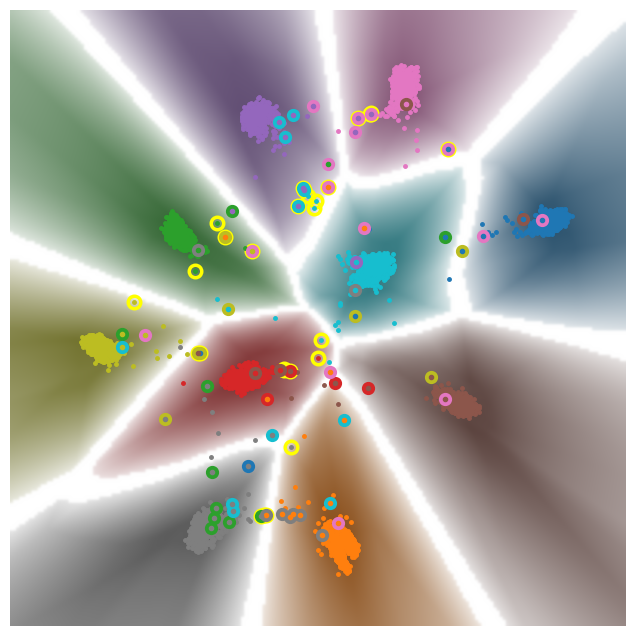

In [5]:
from singleVis.visualizer_test import visualizer
epoch = 15
vis = visualizer(data_provider, data_provider.test_representation(epoch), projector, 200,[],'tab10')
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'test')))

Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8342.89it/s]

Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8362.57it/s]


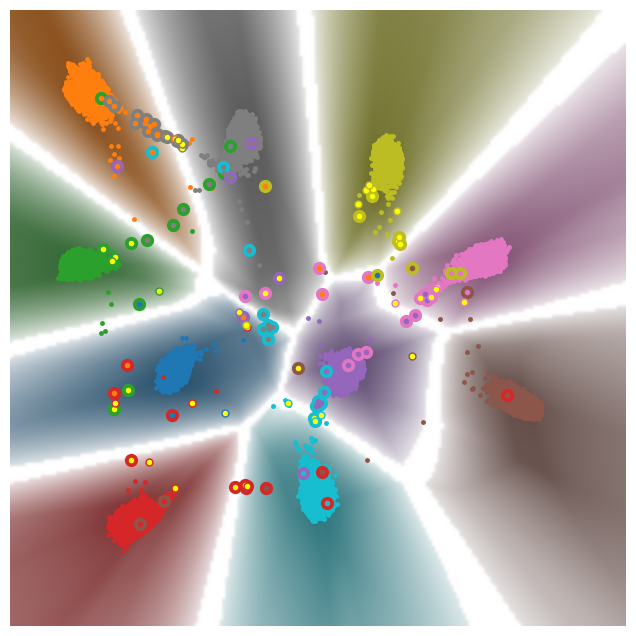

In [16]:
from singleVis.visualizer_hlb_ import visualizer
epoch = 15
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))


Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8331.51it/s]


Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8351.31it/s]


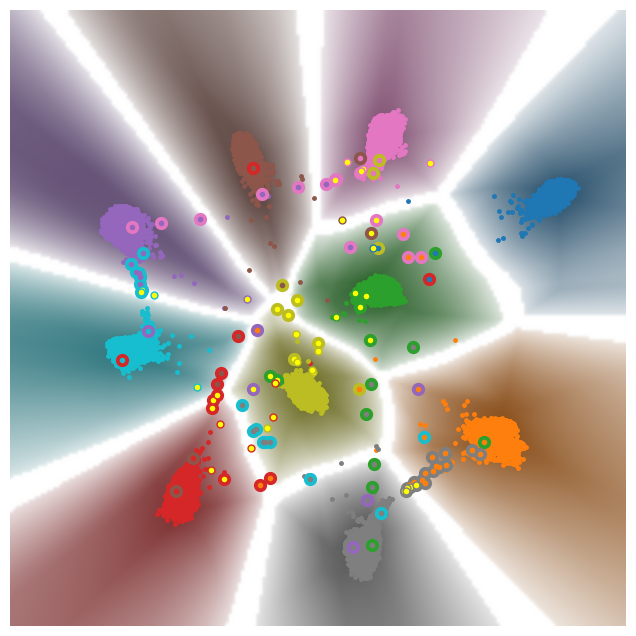

In [24]:
from singleVis.visualizer_hlb_ import visualizer
epoch = 15
border = data_provider.border_representation(epoch)
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='tvi', device=DEVICE)  
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))


In [8]:
"""get high dimensional grid, 2d grid embedding and border vector"""
epoch= 20
grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)
train_data_embedding = projector.batch_project(epoch, data_provider.train_representation(epoch))

Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 200/200 [00:00<00:00, 9597.18it/s]

Successfully load the DVI visualization model for iteration 20


In [9]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 假设 train_data_embedding 和 grid_emd 都是 numpy arrays，每一行都是一个点
threshold = 5  # 设置你的阈值

# 使用 train_data_embedding 初始化 NearestNeighbors 对象
nbrs = NearestNeighbors(n_neighbors=1, algorithm='ball_tree').fit(train_data_embedding)
# 对于 grid_emd 中的每一个点，找到 train_data_embedding 中离它最近的点
distances, indices = nbrs.kneighbors(grid_emd)
# 找到距离小于阈值的索引
mask = distances.ravel() < threshold
selected_indices = np.arange(grid_emd.shape[0])[mask]

border_indices = np.arange(grid_emd.shape[0])[border==1]
union_indices = np.union1d(selected_indices, border_indices)

In [23]:
epoch = 15
def if_border(data):
    mesh_preds = data_provider.get_pred(epoch, data)
    mesh_preds = mesh_preds + 1e-8

    sort_preds = np.sort(mesh_preds, axis=1)
    diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
    border = np.zeros(len(diff), dtype=np.uint8) + 0.05
    border[diff < 0.15] = 1
        
    return border
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='tvi', device=DEVICE)  
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

mesh_preds = data_provider.get_pred(epoch, data_provider.train_representation(epoch))
mesh_preds = mesh_preds + 1e-8

sort_preds = np.sort(mesh_preds, axis=1)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
training_border = np.zeros(len(diff), dtype=np.uint8) + 0.05
training_border[diff < 0.15] = 1

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
old_border_list = if_border(data_provider.train_representation(epoch))
new_border_list = if_border(training_new_data)
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        k = k+1
m = 0
for i in range(len(pred)):
    if old_border_list[i] != new_border_list[i]:
        m = m+1
print(k, m )

Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8285.65it/s]

Successfully load the DVI visualization model for iteration 15



100%|██████████| 300/300 [00:00<00:00, 8328.53it/s]


100%|██████████| 300/300 [00:00<00:00, 8311.26it/s]


73 55


Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 7853.77it/s]


Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 7811.25it/s]


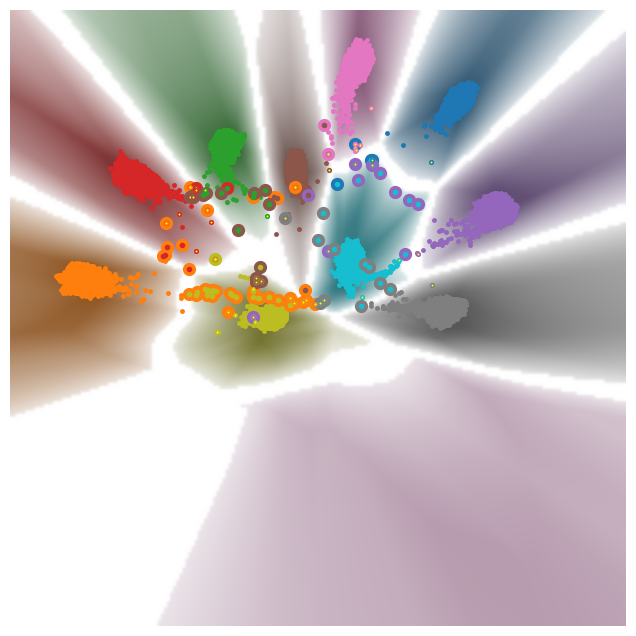

In [12]:
from singleVis.visualizer import visualizer

vis = visualizer(data_provider, projector, 200, "tab10")
vis.show_grid_embedding(epoch=epoch, data=data_provider.train_representation(epoch), border=training_border, embedding=training_emd, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 120/120 [00:00<00:00, 12248.23it/s]

Successfully load the DVI visualization model for iteration 15



100%|██████████| 120/120 [00:00<00:00, 11853.06it/s]


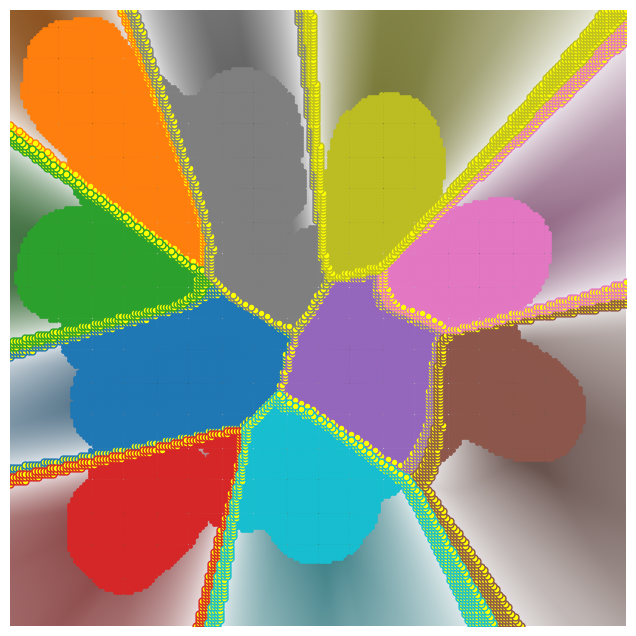

In [13]:
vis.show_grid_embedding(epoch=epoch, data=grid_high[[union_indices]], border=border[[union_indices]], embedding=grid_emd[union_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 27/27 [00:00<00:00, 14318.65it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 27/27 [00:00<00:00, 13768.54it/s]


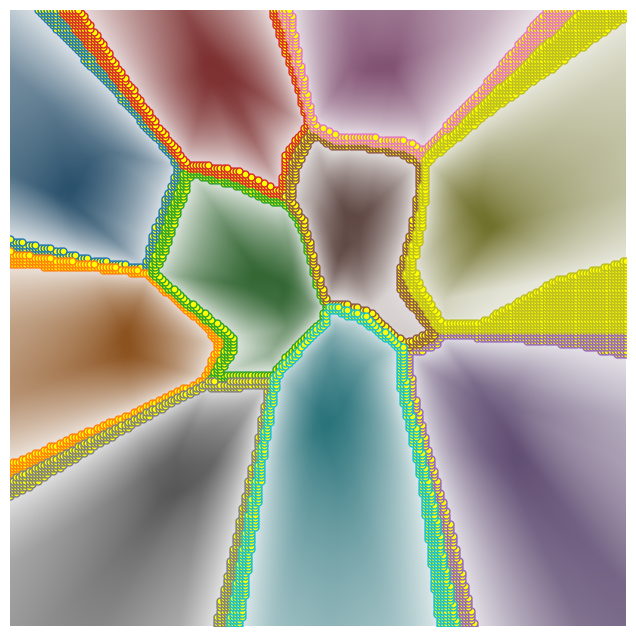

In [10]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[border_indices]], border=border[[border_indices]], embedding=grid_emd[border_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20
Computing decision regions ...
Successfully load the DVI visualization model for iteration 20
Successfully load the DVI visualization model for iteration 20


100%|██████████| 27/27 [00:00<00:00, 13370.27it/s]


Successfully load the DVI visualization model for iteration 20


100%|██████████| 27/27 [00:00<00:00, 13034.78it/s]


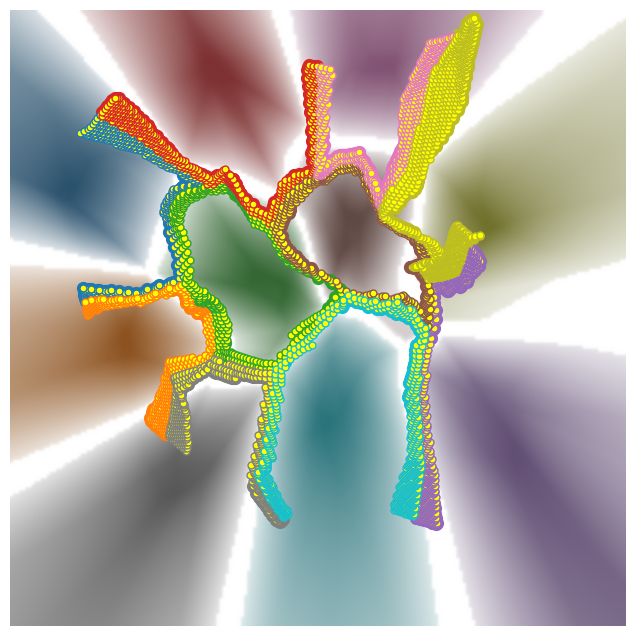

In [11]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[border_indices]], border=border[[border_indices]], embedding=emb_new[border_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14
Computing decision regions ...
Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 139/139 [00:00<00:00, 11518.26it/s]


Successfully load the DVI visualization model for iteration 14


100%|██████████| 139/139 [00:00<00:00, 11442.08it/s]


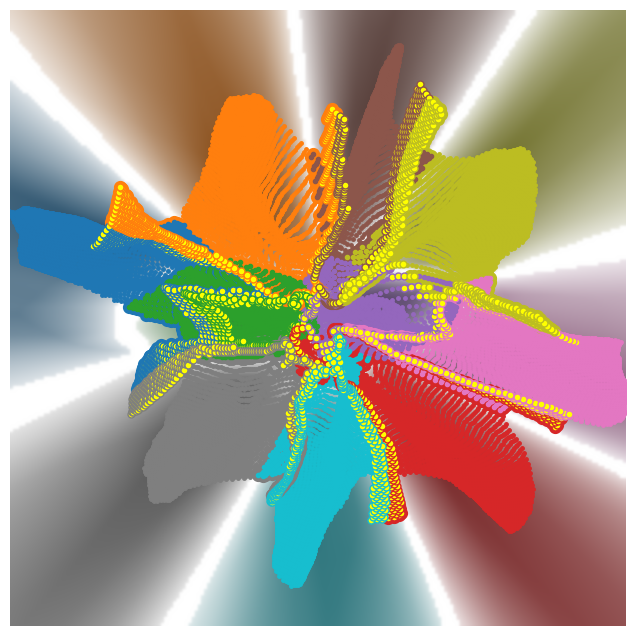

In [12]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[union_indices]], border=border[[union_indices]], embedding=emb_new[union_indices], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

In [10]:
####### use active learning select wrong decoder sample.
len(grid_high)
for i in range(len(grid_high)):
    sample = grid_high[i]

In [ ]:
# from trustVis.data_generation import DataGeneration
# epoch = 15
# dataGeneration = DataGeneration(net, data_provider,epoch,data_provider.DEVICE)

# _,adv_X = dataGeneration.gen(epsilon=0.2,sample_ratio=0.1)


NameError: name 'DataGeneration' is not defined

In [20]:
"""Add grid into train
"""

from singleVis.SingleVisualizationModel import VisModel
from singleVis.spatial_edge_constructor import SingleEpochSpatialEdgeConstructorForGrid

pre_model = VisModel(ENCODER_DIMS, DECODER_DIMS)
file_path = os.path.join(CONTENT_PATH, "Model", "Epoch_{}".format(epoch), "{}.pth".format('dvi'))
save_model = torch.load(file_path, map_location="cpu")
pre_model.load_state_dict(save_model["state_dict"])
pre_model.to(DEVICE)


VisModel(
  (encoder): Sequential(
    (0): Linear(in_features=512, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=2, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=2, out_features=256, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=256, out_features=512, bias=True)
  )
)

In [3]:
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)  
training_emd = projector.batch_project(epoch, data_provider.train_representation(epoch))

mesh_preds = data_provider.get_pred(epoch, data_provider.train_representation(epoch))
mesh_preds = mesh_preds + 1e-8

sort_preds = np.sort(mesh_preds, axis=1)
diff = (sort_preds[:, -1] - sort_preds[:, -2]) / (sort_preds[:, -1] - sort_preds[:, 0])
training_border = np.zeros(len(diff), dtype=np.uint8) + 0.05
training_border[diff < 0.15] = 1

training_new_data = projector.batch_inverse(epoch,training_emd )
pred =  data_provider.get_pred(epoch, data_provider.train_representation(epoch)).argmax(axis=1)
new_pred = data_provider.get_pred(epoch, training_new_data).argmax(axis=1)
k = 0
indicates = []
for i in range(len(pred)):
    if pred[i] != new_pred[i]:
        indicates.append(i)
        k = k+1
print(k)

NameError: name 'DVIProjector' is not defined

In [21]:
import time
# train_list =  union_indices
train_list =  border_indices
optimizer = torch.optim.Adam(pre_model.parameters(), lr=.01, weight_decay=1e-5)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=4, gamma=.1)
# Define Edge dataset
t0 = time.time()
###### all grid + training 
# N_NEIGHBORS = 30
spatial_cons = SingleEpochSpatialEdgeConstructorForGrid(data_provider, grid_high[train_list], epoch, S_N_EPOCHS, B_N_EPOCHS, N_NEIGHBORS,only_grid=False)
###### only grid 
# spatial_cons = SingleEpochSpatialEdgeConstructorForGrid(data_provider, grid_high[union_indices], epoch, S_N_EPOCHS, B_N_EPOCHS, N_NEIGHBORS,only_grid=True)
edge_to, edge_from, probs, feature_vectors, attention = spatial_cons.construct()
t1 = time.time()
from singleVis.custom_weighted_random_sampler import CustomWeightedRandomSampler
from singleVis.SingleVisualizationModel import VisModel
from singleVis.losses import UmapLoss, ReconstructionLoss, TemporalLoss, DVILoss, SingleVisLoss, DummyTemporalLoss
from singleVis.edge_dataset import DVIDataHandler
from torch.utils.data import WeightedRandomSampler
from torch.utils.data import DataLoader
probs = probs / (probs.max()+1e-3)
eliminate_zeros = probs>5e-2    #1e-3
edge_to = edge_to[eliminate_zeros]
edge_from = edge_from[eliminate_zeros]
probs = probs[eliminate_zeros]
dataset = DVIDataHandler(edge_to, edge_from, feature_vectors, attention)

n_samples = int(np.sum(S_N_EPOCHS * probs) // 1)
# chose sampler based on the number of dataset
if len(edge_to) > pow(2,24):
    sampler = CustomWeightedRandomSampler(probs, n_samples, replacement=True)
else:
    sampler = WeightedRandomSampler(probs, n_samples, replacement=True)
edge_loader = DataLoader(dataset, batch_size=2000, sampler=sampler, num_workers=8, prefetch_factor=10)
from umap.umap_ import find_ab_params
temporal_loss_fn = DummyTemporalLoss(DEVICE)
# LAMBDA1 = 3
# Define Losses
negative_sample_rate = 5
min_dist = .1
_a, _b = find_ab_params(1.0, min_dist)
umap_loss_fn = UmapLoss(negative_sample_rate, DEVICE, _a, _b, repulsion_strength=1.0)
recon_loss_fn = ReconstructionLoss(beta=1.0)
single_loss_fn = SingleVisLoss(umap_loss_fn, recon_loss_fn, lambd=LAMBDA1)
criterion = DVILoss(umap_loss_fn, recon_loss_fn, temporal_loss_fn, lambd1=LAMBDA1, lambd2=0.0,device=DEVICE)

train_data (64150, 512) if only: False
Tue Jul 18 20:53:14 2023 Building RP forest with 18 trees


Tue Jul 18 20:53:15 2023 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations


In [15]:

from singleVis.trainer import SingleVisTrainer
from tqdm import tqdm
from singleVis.losses import PositionRecoverLoss

def disable_grad(model):
    for param in model.parameters():
        param.requires_grad = False   
        
class DVIReFineTrainer(SingleVisTrainer):
    def __init__(self, model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, grid, disable_encoder_grad=False, **kwargs):
        super().__init__(model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, **kwargs)
        self.disable_encoder_grad = disable_encoder_grad
        self.grid = grid

    
    def train_step(self):
        
        self.model = self.model.to(device=self.DEVICE)
        ####### disable encoder
        if self.disable_encoder_grad == True:
            disable_grad(self.model.encoder)

        self.model.train()
        all_loss = []
        umap_losses = []
        recon_losses = []
        temporal_losses = []
        recoverposition_losses = []
        # loss_fn = PositionRecoverLoss()

        t = tqdm(self.edge_loader, leave=True, total=len(self.edge_loader))
        
        for data in t:
            edge_to, edge_from, a_to, a_from = data

            edge_to = edge_to.to(device=self.DEVICE, dtype=torch.float32)
            edge_from = edge_from.to(device=self.DEVICE, dtype=torch.float32)
            a_to = a_to.to(device=self.DEVICE, dtype=torch.float32)
            a_from = a_from.to(device=self.DEVICE, dtype=torch.float32)

            outputs = self.model(edge_to, edge_from)
            umap_l, recon_l, temporal_l, loss = self.criterion(edge_to, edge_from, a_to, a_from, self.model, outputs)

            grid_high = self.model.decoder(torch.Tensor(self.grid).to(self.DEVICE))
            new_emb = self.model.encoder(grid_high).to(self.DEVICE)

            pos_recover_loss_fn = PositionRecoverLoss(self.DEVICE)

            pos_loss = pos_recover_loss_fn(torch.Tensor(self.grid).to(self.DEVICE), torch.Tensor(new_emb))

            all_loss.append(loss.mean().item())
            umap_losses.append(umap_l.item())
            recon_losses.append(recon_l.item())
            temporal_losses.append(temporal_l.mean().item())
            recoverposition_losses.append(pos_loss.mean().item())
            # ===================backward====================
            recoverposition_loss = sum(recoverposition_losses) / len(recoverposition_losses)
            loss_new = loss + 1 * recoverposition_loss
            self.optimizer.zero_grad()
            loss_new.mean().backward()
            # pos_loss.mean().backward()
            self.optimizer.step()
        self._loss = sum(all_loss) / len(all_loss)
        self.model.eval()
        print('umap:{:.4f}\trecon_l:{:.4f}\ttemporal_l:{:.4f}\tloss:{:.4f}\tecoverposition_losses:{}'.format(sum(umap_losses) / len(umap_losses),
                                                                sum(recon_losses) / len(recon_losses),
                                                                sum(temporal_losses) / len(temporal_losses),
                                                                sum(all_loss) / len(all_loss), sum(recoverposition_losses) / len(all_loss)))
        return self.loss
    
    def record_time(self, save_dir, file_name, operation, iteration, t):
        # save result
        save_file = os.path.join(save_dir, file_name+".json")
        if not os.path.exists(save_file):
            evaluation = dict()
        else:
            f = open(save_file, "r")
            evaluation = json.load(f)
            f.close()
        if operation not in evaluation.keys():
            evaluation[operation] = dict()
        evaluation[operation][iteration] = round(t, 3)
        with open(save_file, 'w') as f:
            json.dump(evaluation, f)

In [16]:
# from singleVis.trainer import DVIReFineTrainer
trainer = DVIReFineTrainer(pre_model, criterion, optimizer, lr_scheduler, edge_loader, DEVICE, grid_emd[union_indices], disable_encoder_grad = True)

t2=time.time()
trainer.train(PATIENT, MAX_EPOCH)
t3 = time.time()

    # save result
save_dir = data_provider.model_path
trainer.record_time(save_dir, "time_{}".format(VIS_MODEL_NAME), "complex_construction", str(epoch), t1-t0)
trainer.record_time(save_dir, "time_{}".format(VIS_MODEL_NAME), "training", str(epoch), t3-t2)
save_dir = os.path.join(data_provider.model_path, "Epoch_{}".format(epoch))
trainer.save(save_dir=save_dir, file_name="{}".format('dvi_grid'))

print("Finish epoch {}...".format(epoch))

epoch:1


100%|██████████| 104/104 [00:01<00:00, 53.88it/s]


umap:0.0825	recon_l:0.0184	temporal_l:0.0000	loss:0.1009	ecoverposition_losses:18.563572672697212
epoch:2


100%|██████████| 104/104 [00:01<00:00, 53.30it/s]


umap:0.0825	recon_l:0.0093	temporal_l:0.0000	loss:0.0918	ecoverposition_losses:15.37862919844114
epoch:3


100%|██████████| 104/104 [00:01<00:00, 54.31it/s]


umap:0.0824	recon_l:0.0087	temporal_l:0.0000	loss:0.0911	ecoverposition_losses:16.7281164756188
epoch:4


100%|██████████| 104/104 [00:01<00:00, 53.97it/s]


umap:0.0828	recon_l:0.0083	temporal_l:0.0000	loss:0.0911	ecoverposition_losses:15.734920712617727
epoch:5


100%|██████████| 104/104 [00:01<00:00, 54.25it/s]


umap:0.0822	recon_l:0.0076	temporal_l:0.0000	loss:0.0898	ecoverposition_losses:15.04709934271299
epoch:6


100%|██████████| 104/104 [00:01<00:00, 54.11it/s]

umap:0.0824	recon_l:0.0075	temporal_l:0.0000	loss:0.0899	ecoverposition_losses:15.344634001071636
Time spend: 11.59 for training vis model...
Successfully save visualization model...
Finish epoch 15...


Successfully load the DVI visualization model for iteration 15
Computing decision regions ...
Successfully load the DVI visualization model for iteration 15
Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8192.69it/s]


Successfully load the DVI visualization model for iteration 15


100%|██████████| 300/300 [00:00<00:00, 8135.12it/s]

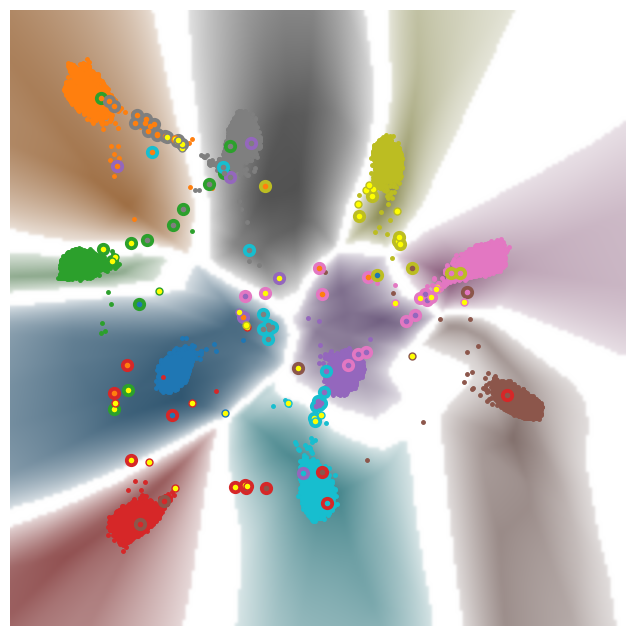

In [17]:
# Define Projector
from singleVis.visualizer_hlb_ import visualizer
# projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi', device=DEVICE)  
# vis = visualizer(data_provider, projector, 200, "tab10")
projector = DVIProjector(vis_model=model, content_path=CONTENT_PATH, vis_model_name='dvi_grid', device=DEVICE)    
vis = visualizer(data_provider, projector, 200, "tab10")
vis.savefig(epoch,path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))

In [16]:
grid_high, grid_emd ,border = vis.get_epoch_decision_view(epoch,200,None, True)

Computing decision regions ...
Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14


100%|██████████| 200/200 [00:00<00:00, 7192.43it/s]


Successfully load the DVI visualization model for iteration 14


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


Successfully load the DVI visualization model for iteration 14
Computing decision regions ...
Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14


100%|██████████| 150/150 [00:00<00:00, 7895.31it/s]


Successfully load the DVI visualization model for iteration 14


100%|██████████| 150/150 [00:00<00:00, 7787.71it/s]


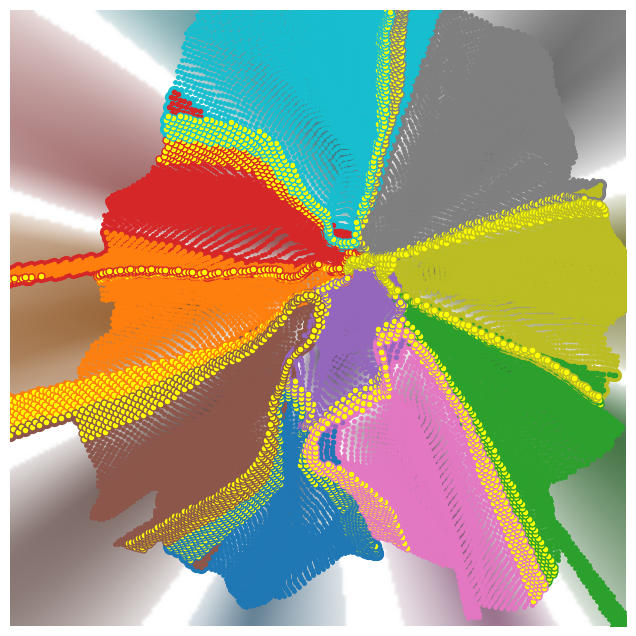

In [17]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[union_indices]], border=border[[union_indices]],embedding=emb_new[[union_indices]], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14
Computing decision regions ...
Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  
100%|██████████| 16/16 [00:00<00:00, 7121.06it/s]


Successfully load the DVI visualization model for iteration 14


100%|██████████| 16/16 [00:00<00:00, 11964.50it/s]


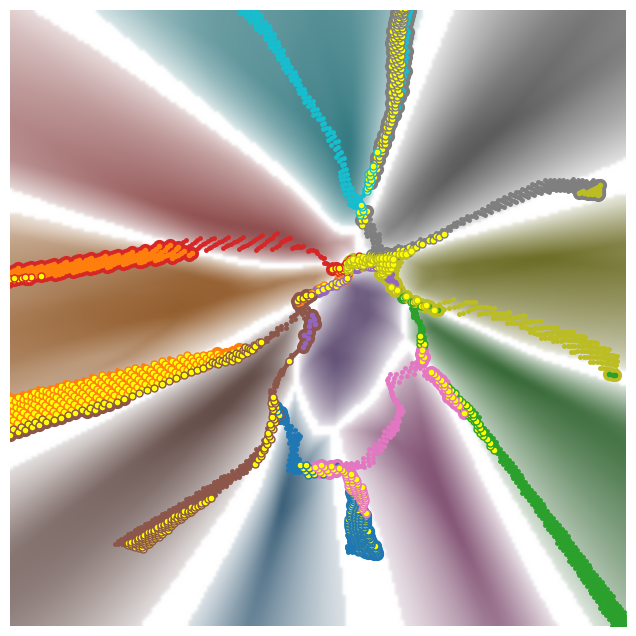

In [18]:
emb_new = projector.batch_project(epoch, grid_high)
vis.show_grid_embedding(epoch=epoch, data=grid_high[[border_indices]], border=border[[border_indices]],embedding=emb_new[[border_indices]], path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, VIS_METHOD+'_grid')))

Successfully load the DVI visualization model for iteration 14
Computing decision regions ...
Successfully load the DVI visualization model for iteration 14
Successfully load the DVI visualization model for iteration 14


100%|██████████| 300/300 [00:00<00:00, 4518.96it/s]


Successfully load the DVI visualization model for iteration 14


100%|██████████| 300/300 [00:00<00:00, 4404.50it/s]


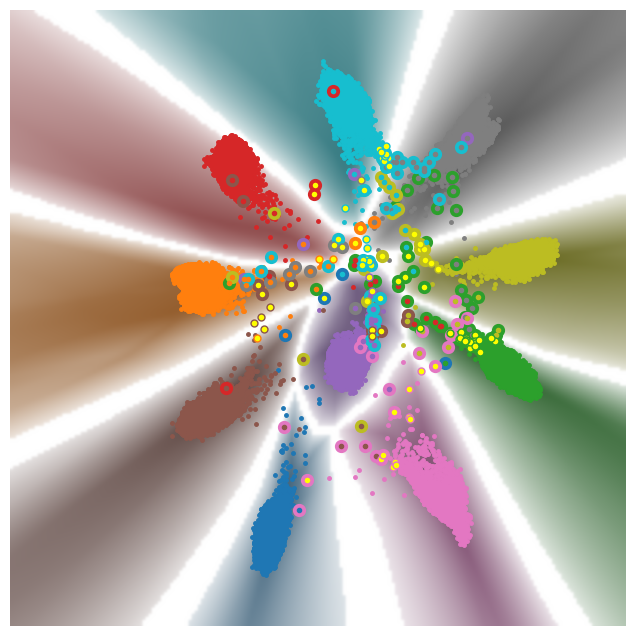

In [15]:
vis.savefig(epoch, path=os.path.join(save_dir, "{}_{}_{}.png".format(DATASET, epoch, 'dvigrid')))